In [1]:
import os
import cv2 
import numpy as np
import rasterio

from scipy.ndimage import zoom, rotate
from matplotlib import pyplot as plt 


In [2]:
# T34VFJ and T35VLD = Riga


In [3]:
files = {}

for f in os.listdir("/home/kristaps/Projs/bulbulis/data"):
    if ".jp2" in f:
        parts = f.split("_")
        if parts[0] not in files:
            files[parts[0]] = {}
        if parts[1] not in files[parts[0]]:
            files[parts[0]][parts[1]] = {}
        files[parts[0]][parts[1]][parts[2]] = f"/home/kristaps/Projs/bulbulis/data/{f}"


In [4]:
dates = []
for f in files.values():
    dates += list(f.keys())
dates = sorted(list(set(dates)))
    

In [5]:
left = np.dstack((np.full((4*10980, 10980), 0.0), np.full((4*10980, 10980), 0.0), np.full((4*10980, 10980), 0.0)))
left_offsets = {
    "T34VFK": 0,
    "T34VFJ": 1,
    "T34VFH": 2,
    "T34UFG": 3,
}
right = np.dstack((np.full((4*10980, 10980), 0.0), np.full((4*10980, 10980), 0.0), np.full((4*10980, 10980), 0.0)))
right_offsets = {
    "T35VLE": 0,
    "T35VLD": 1,
    "T35VLC": 2,
    "T35ULB": 3,
}

merged = np.dstack((np.full((4*11380, 21960), 0.0), np.full((4*11380, 21960), 0.0), np.full((4*11380, 21960), 0.0)))


In [6]:
gain = 2

for d in dates[10:20]:
    for k,v in left_offsets.items():
        if d in files[k]:
            fj = files[k][d]
            try:
                scl = np.repeat(np.repeat(rasterio.open(fj["SCL"], driver="JP2OpenJPEG").read(1), 2, 0), 2, 1)
                c_red = np.clip(rasterio.open(fj["B04"], driver="JP2OpenJPEG").read(1)*gain/10000, 0, 1)
                c_green = np.clip(rasterio.open(fj["B03"], driver="JP2OpenJPEG").read(1)*gain/10000, 0, 1) 
                c_blue = np.clip(rasterio.open(fj["B02"], driver="JP2OpenJPEG").read(1)*gain/10000, 0, 1)
                
                mask = ((scl != 0) & (scl != 1) & (scl != 3) & (scl != 7) & (scl != 8) & (scl != 9) & (scl != 10))
    
                print(d, k)
                cell_offset = v*10980
                left[cell_offset:cell_offset+10980, :, 0][mask] = c_red[mask]
                left[cell_offset:cell_offset+10980, :, 1][mask] = c_green[mask]
                left[cell_offset:cell_offset+10980, :, 2][mask] = c_blue[mask]
    
                offset = 300+cell_offset
                merged[offset:10980+offset, :10980, 0][mask] = c_red[mask]
                merged[offset:10980+offset, :10980, 1][mask] = c_green[mask]
                merged[offset:10980+offset, :10980, 2][mask] = c_blue[mask]
            except BaseException as e:
                print(e)
    for k,v in right_offsets.items(): # TODO: fix
        if d in files[k]:
            fj = files[k][d]
            try:
                deg = 5
                scl = rotate(np.repeat(np.repeat(rasterio.open(fj["SCL"], driver="JP2OpenJPEG").read(1), 2, 0), 2, 1), deg, reshape=False)
                c_red = np.clip(rotate(rasterio.open(fj["B04"], driver="JP2OpenJPEG").read(1), deg, reshape=False)*gain/10000, 0, 1)
                c_green = np.clip(rotate(rasterio.open(fj["B03"], driver="JP2OpenJPEG").read(1), deg, reshape=False)*gain/10000, 0, 1)
                c_blue = np.clip(rotate(rasterio.open(fj["B02"], driver="JP2OpenJPEG").read(1), deg, reshape=False)*gain/10000, 0, 1)
                
                mask = ((scl != 0) & (scl != 1) & (scl != 3) & (scl != 7) & (scl != 8) & (scl != 9) & (scl != 10))
    
                print(d, k)
                cell_offset = v*10980
                right[cell_offset:cell_offset+10980, :, 0][mask] = c_red[mask]
                right[cell_offset:cell_offset+10980, :, 1][mask] = c_green[mask]
                right[cell_offset:cell_offset+10980, :, 2][mask] = c_blue[mask]
    
                s = 10980-4750
                merged[cell_offset:10980+cell_offset, s:10980+s, 0][mask] = c_red[mask]
                merged[cell_offset:10980+cell_offset, s:10980+s, 1][mask] = c_green[mask]
                merged[cell_offset:10980+cell_offset, s:10980+s, 2][mask] = c_blue[mask]
            except BaseException as e:
                print(e)
            

20150810T100016 T34VFK
20150810T100016 T34VFJ
20150810T100016 T34VFK
20150810T100016 T34VFJ
20150811T093006 T34VFH
20150811T093006 T34UFG
20150811T093006 T34VFH
20150811T093006 T34UFG
20150814T094006 T34VFK
20150814T094006 T34VFJ
20150814T094006 T34VFH
20150814T094006 T34UFG
20150814T094006 T34VFK
20150814T094006 T34VFJ
20150814T094006 T34VFH
20150814T094006 T34UFG
20150817T095016 T34VFK
20150817T095016 T34VFJ
20150817T095016 T34VFH
20150817T095016 T34UFG
20150817T095016 T34VFK
20150817T095016 T34VFJ
20150817T095016 T34VFH
20150817T095016 T34UFG
20150820T100016 T34VFK
20150820T100016 T34VFJ
20150820T100016 T34VFK
20150820T100016 T34VFJ
20150821T093006 T34VFH
20150821T093006 T34UFG
20150821T093006 T34VFH
20150821T093006 T34UFG
20150824T094006 T34VFK
20150824T094006 T34VFJ
20150824T094006 T34VFH
20150824T094006 T34UFG
20150824T094006 T34VFK
20150824T094006 T34VFJ
20150824T094006 T34VFH
20150824T094006 T34UFG
20150827T095016 T34VFK
20150827T095016 T34VFJ
20150827T095016 T34VFH
20150827T09

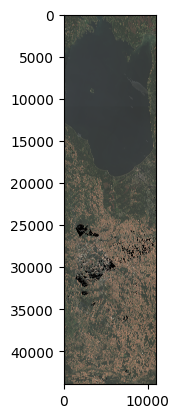

In [7]:
plt.imshow(left)

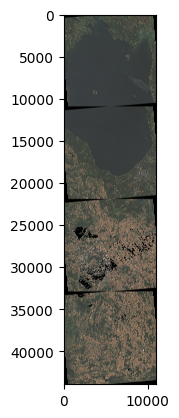

In [8]:
plt.imshow(right)

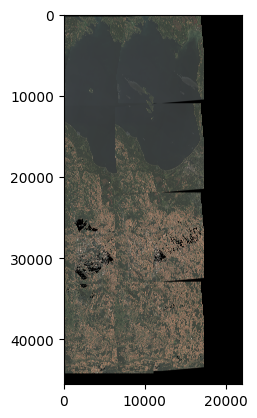

In [9]:
plt.imshow(merged)